In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("news.csv")
df.head()

,text,subject,fake
0,Donald Trump just couldn t wish all Americans ...,News,1
1,House Intelligence Committee Chairman Devin Nu...,News,1
2,"On Friday, it was revealed that former Milwauk...",News,1
3,"On Christmas day, Donald Trump announced that ...",News,1
4,Pope Francis used his annual Christmas Day mes...,News,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     408 non-null    object
 1   subject  408 non-null    object
 2   fake     408 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.7+ KB


In [ ]:
df["fake"]

0      1
1      1
2      1
3      1
4      1
      ..
403    0
404    0
405    0
406    0
407    0
Name: fake, Length: 408, dtype: int64

In [ ]:
df["fake"].value_counts()

1    204
0    204
Name: fake, dtype: int64

In [ ]:
df["text"]

0      Donald Trump just couldn t wish all Americans ...
1      House Intelligence Committee Chairman Devin Nu...
2      On Friday, it was revealed that former Milwauk...
3      On Christmas day, Donald Trump announced that ...
4      Pope Francis used his annual Christmas Day mes...
                             ...                        
403    Tune in to the Alternate Current Radio Network...
404    Shawn Helton  21st Century WireWhen looking at...
405     Antifa (Photo: Twitter)Diana Johnstone 21st C...
406    TWO PROTAGONISTS: Jesus Campos, and alleged sh...
407    This latest move by America s notorious Transp...
Name: text, Length: 408, dtype: object

In [ ]:
df["text"][0]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

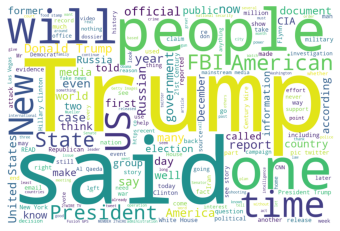

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(width=1200, height=800,
               background_color="white",
               min_font_size=10)

wc.generate(" ".join(df[df["fake"]==1]["text"]))
plt.imshow(wc)
plt.axis("off")
plt.show()

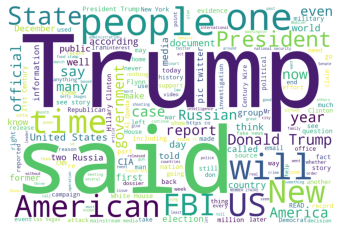

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(width=1200, height=800,
               background_color="white",
               min_font_size=10)

wc.generate(" ".join(df[df["fake"]==0]["text"]))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
import nltk

from nltk.tokenize import word_tokenize
nltk.download("punkt")

from nltk.corpus import stopwords
nltk.download("stopwords")

from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def cleantext(text):
  tokens = word_tokenize(text.lower())
  wordtoken = [t for t in tokens if(t.isalpha())]
  stopword = stopwords.words("english")
  cleantoken = [t for t in wordtoken if(t not in stopword)]
  lemma = WordNetLemmatizer()
  lemmatoken = [lemma.lemmatize(t) for t in cleantoken]
  return " ".join(lemmatoken)


In [ ]:
df.text.head()

0    Donald Trump just couldn t wish all Americans ...
1    House Intelligence Committee Chairman Devin Nu...
2    On Friday, it was revealed that former Milwauk...
3    On Christmas day, Donald Trump announced that ...
4    Pope Francis used his annual Christmas Day mes...
Name: text, dtype: object

In [ ]:
df["text"] = df["text"].apply(cleantext)


In [ ]:
x = df["text"] #1D
y = df["fake"] #1D

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(x).toarray()

In [ ]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
ypred = logreg.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.12      0.09      0.10        56
           1       0.16      0.22      0.19        46

    accuracy                           0.15       102
   macro avg       0.14      0.15      0.15       102
weighted avg       0.14      0.15      0.14       102



In [ ]:
df.head()

,text,subject,fake
0,donald trump wish american happy new year leav...,News,1
1,house intelligence committee chairman devin nu...,News,1
2,friday revealed former milwaukee sheriff david...,News,1
3,christmas day donald trump announced would bac...,News,1
4,pope francis used annual christmas day message...,News,1


In [ ]:
messgs = df["text"][2]
messgh = df["text"][210]

In [ ]:
ctest = cleantext(messgs)

In [ ]:
ctest

'friday revealed former milwaukee sheriff david clarke considered homeland security secretary donald trump administration email scandal january brief plane clarke fellow passenger dan black later detained police reason whatsoever except maybe feeling hurt clarke messaged police stop black deplaned search warrant executed fbi see calling fake news even though copy search warrant internet unintimidated lib medium attempt smear discredit fake news report designed silence former sheriff tweeted continue poke eye sharp stick bitch slap scum bag til get attacked better people maga unintimidated lib medium attempt smear discredit fake news report designed silence continue poke eye sharp stick bitch slap scum bag til get attacked better people maga david clarke sheriffclarke december stop news lying lib medium make fake news smear antidote go right punch nose make taste blood nothing get bully like lying lib medium attention better give taste blood neverbackdown david clarke sheriffclarke dece

In [ ]:
newdata = cv.transform([ctest])


In [ ]:
ypred  = logreg.predict(newdata)

In [ ]:
ypred[0]

1

In [ ]:
def checksentiment(text):
  xtext = cleantext(text)
  x = cv.transform([xtext])
  ypred = logreg.predict(x)
  return ypred[0]

In [ ]:
checksentiment(messgs)

1

In [ ]:
checksentiment(messgh)

0